In [77]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime


In [78]:
df = pd.read_csv("../data/01_input_history.csv")

In [79]:
df

,Country,Product,Month,Quantity
0,Japan,MorningMint,Jan2004,0
1,Japan,MorningMint,Feb2004,0
2,Japan,MorningMint,Mar2004,0
3,Japan,MorningMint,Apr2004,0
4,Japan,MorningMint,May2004,0
...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0


In [80]:
df['date'] = pd.to_datetime(df['Month'], format='%b%Y')

In [81]:
df

,Country,Product,Month,Quantity,date
0,Japan,MorningMint,Jan2004,0,2004-01-01
1,Japan,MorningMint,Feb2004,0,2004-02-01
2,Japan,MorningMint,Mar2004,0,2004-03-01
3,Japan,MorningMint,Apr2004,0,2004-04-01
4,Japan,MorningMint,May2004,0,2004-05-01
...,...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0,2023-08-01
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0,2023-09-01
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0,2023-10-01
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0,2023-11-01


<Axes: xlabel='date', ylabel='Quantity'>

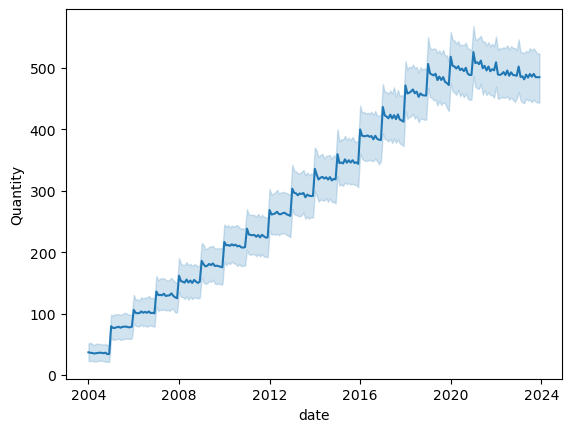

In [82]:
sns.lineplot(data=df, x='date', y='Quantity')

In [83]:
df

,Country,Product,Month,Quantity,date
0,Japan,MorningMint,Jan2004,0,2004-01-01
1,Japan,MorningMint,Feb2004,0,2004-02-01
2,Japan,MorningMint,Mar2004,0,2004-03-01
3,Japan,MorningMint,Apr2004,0,2004-04-01
4,Japan,MorningMint,May2004,0,2004-05-01
...,...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0,2023-08-01
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0,2023-09-01
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0,2023-10-01
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0,2023-11-01


In [84]:
# sns.lineplot(data=df, x='date', y='Quantity', hue='Country')

In [85]:
df.groupby('Country').describe()['Quantity'].sort_values('mean')

,count,mean,min,25%,50%,75%,max,std
Country,,,,,,,,
South Africa,24000.0,63.672875,0.0,0.0,0.0,0.00,2115.0,271.256894
India,24000.0,145.322167,0.0,0.0,0.0,0.00,2243.0,430.287969
Egypt,24000.0,180.979000,0.0,0.0,0.0,0.00,2150.0,437.398637
Australia,24000.0,221.142792,0.0,0.0,0.0,0.00,2135.0,500.450572
Brazil,24000.0,300.795875,0.0,0.0,0.0,0.00,2301.0,578.444887
Japan,24000.0,336.545083,0.0,0.0,0.0,570.00,2317.0,584.903052
Russia,24000.0,386.807458,0.0,0.0,0.0,776.25,2242.0,646.757206
France,24000.0,421.289875,0.0,0.0,0.0,822.00,2205.0,645.960522
Italy,24000.0,459.524083,0.0,0.0,0.0,915.00,2252.0,642.018752


In [86]:
df.groupby('Product').describe()['Quantity'].sort_values('mean').index.tolist()

['PurePore Sanitary Belt',
 'DailyDazzle Toothpaste',
 'SoftStep Shaving Cream for Women',
 'SmilesSoPure Waterpik',
 'GentleGlow Pet Grooming Kit',
 'SmoothOperator Shaving Gel',
 'MorningMint',
 'SoothingSoft Fabric Softener',
 'RadiantRinse Color Protector',
 'HydraHydrate Hand Cream',
 'RadiantRose Face Mask',
 'SkinSational Moisturizer',
 'RadiantRose Hair Serum',
 'SparklingSmile Water Flosser',
 'CalmingClean Bath Time Wash',
 'FreshFusion Mouth Rinse',
 'CleanSlate Disinfectant Spray',
 'SoothingSerenity Baby Rub',
 'HydratingHoney Pet Wipes',
 'SoothingPaws Cat Lotion',
 'CleanSlate Mouthwash',
 'CleanSkin Acne Treatment',
 'SoothingSerenity Baby Oil',
 'SmellSational Baby Room Spray',
 'OralEase Plus Toothbrush',
 'EasyWash Laundry Detergent',
 'SmileSavvy Tooth Whitening Kit',
 'BrightBreeze Baby Sunscreen Stick',
 'DelicateDew Sensitive Wash',
 'LuminousLip Care',
 'EasyWash Pet Laundry Detergent',
 'BrightBreeze Period Pain Relief',
 'BrightBreeze Pet Odor Eliminator',
 'S

In [87]:
hash_countries = {'South Africa': 1,
 'India': 2,
 'Egypt': 3,
 'Australia': 4,
 'Brazil': 5,
 'Japan': 6,
 'Russia': 7,
 'France': 8,
 'Italy': 9,
 'United Kingdom': 10}

In [88]:
hash_products = {}

for i, product in enumerate(df.groupby('Product').describe()['Quantity'].sort_values('mean').index.tolist()):
    hash_products[product] = i+1

In [89]:
hash_products

{'PurePore Sanitary Belt': 1,
 'DailyDazzle Toothpaste': 2,
 'SoftStep Shaving Cream for Women': 3,
 'SmilesSoPure Waterpik': 4,
 'GentleGlow Pet Grooming Kit': 5,
 'SmoothOperator Shaving Gel': 6,
 'MorningMint': 7,
 'SoothingSoft Fabric Softener': 8,
 'RadiantRinse Color Protector': 9,
 'HydraHydrate Hand Cream': 10,
 'RadiantRose Face Mask': 11,
 'SkinSational Moisturizer': 12,
 'RadiantRose Hair Serum': 13,
 'SparklingSmile Water Flosser': 14,
 'CalmingClean Bath Time Wash': 15,
 'FreshFusion Mouth Rinse': 16,
 'CleanSlate Disinfectant Spray': 17,
 'SoothingSerenity Baby Rub': 18,
 'HydratingHoney Pet Wipes': 19,
 'SoothingPaws Cat Lotion': 20,
 'CleanSlate Mouthwash': 21,
 'CleanSkin Acne Treatment': 22,
 'SoothingSerenity Baby Oil': 23,
 'SmellSational Baby Room Spray': 24,
 'OralEase Plus Toothbrush': 25,
 'EasyWash Laundry Detergent': 26,
 'SmileSavvy Tooth Whitening Kit': 27,
 'BrightBreeze Baby Sunscreen Stick': 28,
 'DelicateDew Sensitive Wash': 29,
 'LuminousLip Care': 30,


In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder

In [91]:
df = df.drop(columns=["Month"])

In [92]:
X = df.drop(columns=["Quantity"])

In [93]:
X[['Country']] = OrdinalEncoder().fit_transform(X[['Country']])

In [94]:
X

,Country,Product,date
0,6.0,MorningMint,2004-01-01
1,6.0,MorningMint,2004-02-01
2,6.0,MorningMint,2004-03-01
3,6.0,MorningMint,2004-04-01
4,6.0,MorningMint,2004-05-01
...,...,...,...
239995,7.0,HydratingHoney Pet Wipes,2023-08-01
239996,7.0,HydratingHoney Pet Wipes,2023-09-01
239997,7.0,HydratingHoney Pet Wipes,2023-10-01
239998,7.0,HydratingHoney Pet Wipes,2023-11-01


In [95]:
X[['Product']] = OrdinalEncoder().fit_transform(X[['Product']])

In [96]:
X['Year'] = X['date'].dt.year
X['Month'] = X['date'].dt.month

In [97]:
X

,Country,Product,date,Year,Month
0,6.0,53.0,2004-01-01,2004,1
1,6.0,53.0,2004-02-01,2004,2
2,6.0,53.0,2004-03-01,2004,3
3,6.0,53.0,2004-04-01,2004,4
4,6.0,53.0,2004-05-01,2004,5
...,...,...,...,...,...
239995,7.0,47.0,2023-08-01,2023,8
239996,7.0,47.0,2023-09-01,2023,9
239997,7.0,47.0,2023-10-01,2023,10
239998,7.0,47.0,2023-11-01,2023,11


In [98]:
X = X.drop(columns='date')

In [99]:
y = df['Quantity']

In [100]:
DT = DecisionTreeRegressor().fit(X, y)

In [101]:
y_hat = DT.predict(X)

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y, y_hat)

1.0

In [104]:
df = pd.read_csv("../data/01_input_history.csv")

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
def preprocess_dataset(df_old):
    """
    INPUT:
        - original dataset
        
    RETURNS:
        - processed dataset
        - ordinal encoder of country
        - ordinal encoder of product
    """
    df = df_old.copy()


    df['date'] = pd.to_datetime(df['Month'], format='%b%Y')
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

    df['Year'] = (2025 - df['Year'])
    df['Month'] = (13 - df['Month'])

    df['Product'] = 101 - df['Product'].map(hash_products)
    df['Country'] = 11 - df['Country'].map(hash_countries)

    df = df.drop(columns=['date'])
    
    return df, '', ''


In [107]:
df_preprocessed, _, _ = preprocess_dataset(df)

In [108]:
X = df_preprocessed.drop(columns='Quantity')
y = df_preprocessed['Quantity']

In [109]:
from sklearn.model_selection import TimeSeriesSplit

In [110]:
X

,Country,Product,Month,Year
0,5,94,12,21
1,5,94,11,21
2,5,94,10,21
3,5,94,9,21
4,5,94,8,21
...,...,...,...,...
239995,4,82,5,2
239996,4,82,4,2
239997,4,82,3,2
239998,4,82,2,2


In [111]:
splitter = TimeSeriesSplit(10)

In [112]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [113]:
from xgboost import XGBRegressor


In [114]:
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Quantity', ylabel='Count'>

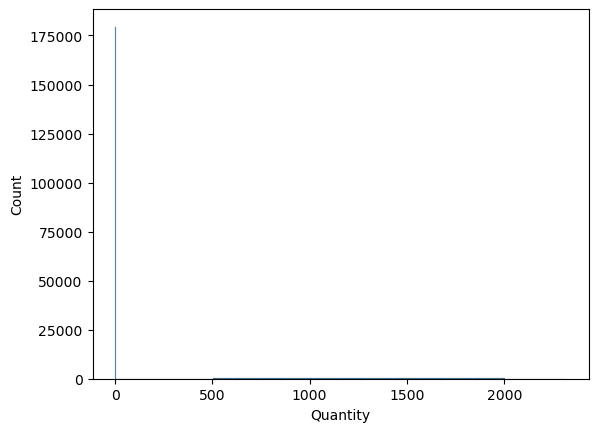

In [115]:
sns.histplot(y)

In [116]:
X

,Country,Product,Month,Year
0,5,94,12,21
1,5,94,11,21
2,5,94,10,21
3,5,94,9,21
4,5,94,8,21
...,...,...,...,...
239995,4,82,5,2
239996,4,82,4,2
239997,4,82,3,2
239998,4,82,2,2


In [117]:
from sklearn.dummy import DummyRegressor

In [118]:
r2_scores = []
for train_idx, test_idx in splitter.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]

    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    DT = DecisionTreeRegressor().fit(X_train, y_train)

    y_hat_test = DT.predict(X_test)
    r2_scores.append(score_i := r2_score(y_test, y_hat_test))
    print(score_i)


-1.0163773414817157
-0.8577231932969753
-1.1954171163495317
-0.3164597143509311
-1.3291174602819082
-1.0096492749852986
-1.0027351748149056
-0.3599311952391746
-0.8929700137705223
-0.6280112927112242


In [119]:
r2_scores

[-1.0163773414817157,
 -0.8577231932969753,
 -1.1954171163495317,
 -0.3164597143509311,
 -1.3291174602819082,
 -1.0096492749852986,
 -1.0027351748149056,
 -0.3599311952391746,
 -0.8929700137705223,
 -0.6280112927112242]

In [120]:
X_train

,Country,Product,Month,Year
0,5,94,12,21
1,5,94,11,21
2,5,94,10,21
3,5,94,9,21
4,5,94,8,21
...,...,...,...,...
218177,4,87,7,20
218178,4,87,6,20
218179,4,87,5,20
218180,4,87,4,20


In [121]:
#

In [122]:
df_test = pd.read_csv("../data/01_output_prediction_example.csv")

In [123]:
df_test.drop(columns=['Quantity'], inplace=True)

In [124]:
df_test_preprocessed, _, __ = preprocess_dataset(df_test)

In [125]:
df_test_preprocessed

,Country,Product,Month,Year
0,5,94,12,1
1,5,94,11,1
2,5,94,10,1
3,5,94,9,1
4,5,94,8,1
...,...,...,...,...
11995,4,82,5,1
11996,4,82,4,1
11997,4,82,3,1
11998,4,82,2,1


In [126]:
# pip install tensorflow

In [127]:
selected = ['Country', 'Product', 'Year']

In [128]:
X_original = X.copy()

In [129]:
X = X_original

In [130]:
X

,Country,Product,Month,Year
0,5,94,12,21
1,5,94,11,21
2,5,94,10,21
3,5,94,9,21
4,5,94,8,21
...,...,...,...,...
239995,4,82,5,2
239996,4,82,4,2
239997,4,82,3,2
239998,4,82,2,2


In [131]:
df_preprocessed

,Country,Product,Month,Quantity,Year
0,5,94,12,0,21
1,5,94,11,0,21
2,5,94,10,0,21
3,5,94,9,0,21
4,5,94,8,0,21
...,...,...,...,...,...
239995,4,82,5,0,2
239996,4,82,4,0,2
239997,4,82,3,0,2
239998,4,82,2,0,2


In [142]:
DT = LinearRegression().fit(X, y)

In [143]:
df_test['Quantity'] = DT.predict(df_test_preprocessed).astype('int')

In [144]:
# df_test['Quantity'] = DummyRegressor().fit(X, y).predict(df_test_preprocessed).astype('int')

In [145]:
df_test.to_csv('../data/01_monster2.csv', index=False)

In [141]:
# try PCA